# CNN-Siamese Training for Myanmar Paraphrase

## Data Information

In [1]:
!pwd

/home/yekyaw.thu/exp/siamese/multihead-siamese-nets


Copied to corpora/QQP/ folder as follows:  

(siamese) yekyaw.thu@gpu:~/exp/siamese/multihead-siamese-nets/corpora/QQP$ cp ../../../4release/4multihead-siamese/* .

In [12]:
!wc ./corpora/QQP/*.csv

   1001   14907  208163 ./corpora/QQP/closed-test-qqp.csv
   1001   10699  144369 ./corpora/QQP/test.csv
  40462  591453 9529408 ./corpora/QQP/train.csv
  42464  617059 9881940 total


Note, training and test data format are difference as follows:  

In [13]:
!head -3 ./corpora/QQP/*.csv

==> ./corpora/QQP/closed-test-qqp.csv <==
"test_id","paraphrase1","paraphrase2"
0,"ကောင်း လိုက် တဲ့ သတင်း လေး ပါ","ကောင်း သော သတင်း ပါ ပဲ"
1,"ခု ဒီ တံဆိပ် က ဈေးလိုက် နေ တယ် ။","ဒီ တံဆိပ် က ဈေး အရမ်း တက် နေ တယ် ။"

==> ./corpora/QQP/test.csv <==
"test_id","paraphrase1","paraphrase2"
0,"၁၁ ဒေါ်လာ ကျ ပါ တယ် ။","၁၁ နာရီ လာ ခေါ် မယ် ။"
1,"၁၁ နာရီ ခွဲ အိမ် ပြန် မယ် ။","၁၁ နာရီ ခွဲ အရောက် လာ ပါ ။"

==> ./corpora/QQP/train.csv <==
"id","pid1","pid2","paraphrase1","paraphrase2","is_paraphrase",
"0","1","2","ကျွန်တော် စီး ဖို့ ချစ်စရာ ဖိနပ် တစ် ရံ ကို ရှာ မတွေ့လို့ပါ ။","တစ်ခါတစ်ခါ ကျွန်တော်က ခင်ဗျား ကို အရမ်း အပြောင်းအလဲများတဲ့လူ လို့ ထင်မိတယ် ။","0"
"1","2","3","ကျေးဇူး ပဲ ၊ ကျွန်တော် ဘယ်လောက် ပေး ရ မလဲ ။","ကျေးဇူး နော် ၊ ဘယ်တော့ ပြန် တွေ့ ကြ မလဲ ။","0"


## Check GPU Status

In [14]:
!nvidia-smi

Fri Dec  2 17:23:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:0A:00.0 Off |                  N/A |
| 29%   45C    P0    58W / 300W |      0MiB / 11019MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:42:00.0 Off |                  N/A |
| 62%   

## Training

In [15]:
!time python run.py train cnn QQP --experiment_name exp-CNN-MYPARA --gpu 1,2,3










INFO:tensorflow:Setting visible GPU to 1,2,3
INFO:tensorflow:Reading main configuration.
INFO:tensorflow:Reading configuration for cnn model.
Traceback (most recent call last):
  File "run.py", line 281, in <module>
    main()
  File "run.py", line 275, in main
    train(main_config, model_config, args.model, experiment_name, args.dataset)
  File "run.py", line 41, in train
    dataset = dataset_type.get_dataset(dataset_name)
  File "/home/yekyaw.thu/exp/siamese/multihead-siamese-nets/data/dataset_type.py", line 21, in get_dataset
    return DATASETS[dataset_name]()
  File "/home/yekyaw.thu/exp/siamese/multihead-siamese-nets/data/qqp.py", line 12, in __init__
    usecols=['question1', 'question2', 'is_duplicate'])
  File "/home/yekyaw.thu/.conda/envs/siamese/lib/python3.6/site-packages/pandas/io/parsers.py", line 688, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/home/yekyaw.thu/.conda/envs/siamese/lib/python3.6/site-packages/pandas/io/parsers.py", line 454, 

## Adjust Column Names

As you can see in the above, I assumed the code is checking with the exact column names and thus, I updated the column names ...  

In [16]:
!head -n 3 ./corpora/QQP/train.csv

"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","ကျွန်တော် စီး ဖို့ ချစ်စရာ ဖိနပ် တစ် ရံ ကို ရှာ မတွေ့လို့ပါ ။","တစ်ခါတစ်ခါ ကျွန်တော်က ခင်ဗျား ကို အရမ်း အပြောင်းအလဲများတဲ့လူ လို့ ထင်မိတယ် ။","0"
"1","2","3","ကျေးဇူး ပဲ ၊ ကျွန်တော် ဘယ်လောက် ပေး ရ မလဲ ။","ကျေးဇူး နော် ၊ ဘယ်တော့ ပြန် တွေ့ ကြ မလဲ ။","0"


In [17]:
!head -n 3 ./corpora/QQP/test.csv

"test_id","question1","question2"
0,"၁၁ ဒေါ်လာ ကျ ပါ တယ် ။","၁၁ နာရီ လာ ခေါ် မယ် ။"
1,"၁၁ နာရီ ခွဲ အိမ် ပြန် မယ် ။","၁၁ နာရီ ခွဲ အရောက် လာ ပါ ။"


In [18]:
!pwd

/home/yekyaw.thu/exp/siamese/multihead-siamese-nets


In [19]:
!time python run.py train cnn QQP --experiment_name exp-CNN-MYPARA










INFO:tensorflow:Setting visible GPU to 0
INFO:tensorflow:Reading main configuration.
INFO:tensorflow:Reading configuration for cnn model.
INFO:tensorflow:Chosen word embeddings.
INFO:tensorflow:Maximum sentence length : 41
INFO:tensorflow:Processing sentences with word embeddings...
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.
INFO:tensorflow:Sentences have been successfully processed.
Instructions for updating:
Please use tensorflow/transform or tf.data.



Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dropout instead.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use `tf.cast` instead.





2022-12-02 17:35

INFO:tensorflow:Training model for 10 epochs
Batches:  99%|▉| 69/70 [00:02<00:00, 28.63it/s, dev_acc=0.88, epoch=3, loss=0.09, train_acc=0.92]
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Batches:  21%|▏| 15/70 [00:00<00:01, 28.35it/s, dev_acc=0.89, epoch=6, loss=0.09, train_acc=0.93]


Epochs: 100%|███████████████████████████████████| 10/10 [00:26<00:00,  2.60s/it]                 

real	0m33.637s
user	8m27.152s
sys	0m8.997s


## Check the Log

## Run on GPU Server Side

(siamese) yekyaw.thu@gpu:~/exp/siamese/multihead-siamese-nets$ tensorboard --logdir logs/QQP/exp-CNN-MYPARA
TensorBoard 1.15.0 at http://gpu.cadt.edu.kh:6007/ (Press CTRL+C to quit)

## Run on Local Machine to See Tensorboard Graph

Note: I hidden the port number with xxxx for the security reason ...  

C:\Users\801680>ssh -p xxxx -L localhost:6007:localhost:6007 -i C:\Users\801680\.ssh\id_rsa-for-cadt-gpu-server yekyaw.thu@103.16.63.233

## Address for Browser

http://localhost:6007/

Now, you can see the accuracy and losss graphs of the training and validation process of CNN Siamese for Myanmar Paraphrase.  

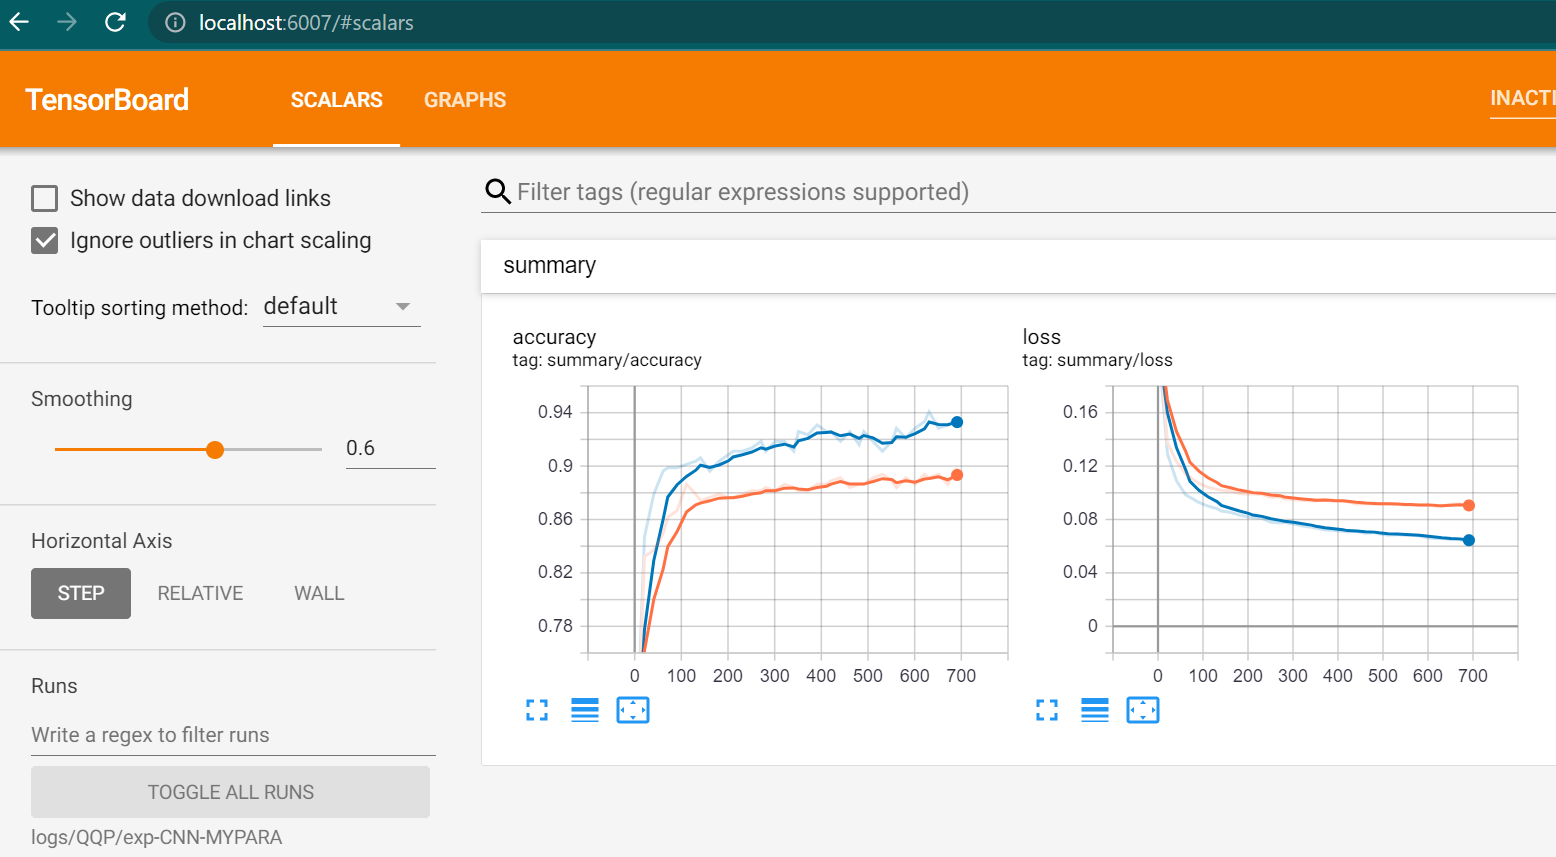

## Model Folder Information

In [6]:
!ls ~/exp/siamese/multihead-siamese-nets/model_dir/exp-CNN-MYPARA/

checkpoint		       model-600.index
evaluation.ini		       model-600.meta
model-500.data-00000-of-00001  model-630.data-00000-of-00001
model-500.index		       model-630.index
model-500.meta		       model-630.meta
model-560.data-00000-of-00001  model-700.data-00000-of-00001
model-560.index		       model-700.index
model-560.meta		       model-700.meta
model-600.data-00000-of-00001


In [7]:
!cat ~/exp/siamese/multihead-siamese-nets/model_dir/exp-CNN-MYPARA/checkpoint

model_checkpoint_path: "model-700"
all_model_checkpoint_paths: "model-500"
all_model_checkpoint_paths: "model-560"
all_model_checkpoint_paths: "model-600"
all_model_checkpoint_paths: "model-630"
all_model_checkpoint_paths: "model-700"


In [8]:
!cat ~/exp/siamese/multihead-siamese-nets/model_dir/exp-CNN-MYPARA/evaluation.ini

[EVALUATION]
mean_dev_acc = 0.8812499925494194
last_dev_acc = 0.8924999833106995
test_acc = 0.8817500010132789
epoch_time = 00:00:02.53
num_trains = 36009
num_devs = 405
num_tests = 4045



# Fin for CNN-Siamese Training with myParaphrase (version 1.0)